Create Player Ratings

In [1]:
import sys
sys.path.append("/Users/ciaran/Documents/Projects/AFL/git-repositories/afl-player-ratings/")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from player_ratings import *

import os
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [3]:
import matplotlib.font_manager as fm

font_path = "/Users/ciaran/Documents/Projects/AFL/git-repositories/afl-player-ratings/viz/fonts"
for x in os.listdir(font_path):
    if x != ".DS_Store":
        for y in os.listdir(f"{font_path}/{x}"):
            if y.split(".")[-1] == "ttf":
                fm.fontManager.addfont(f"{font_path}/{x}/{y}")
                try:
                    fm.FontProperties(weight=y.split("-")[-1].split(".")[0].lower(), fname=y.split("-")[0])
                except Exception:
                    continue
plt.style.use("/Users/ciaran/Documents/Projects/AFL/git-repositories/afl-player-ratings/viz/mplstyle/dark_theme.mplstyle")

In [4]:
player_stats = pd.read_csv("/Users/ciaran/Documents/Projects/AFL/git-repositories/afl-player-ratings/data/player_stats.csv")
player_stats['Season'] = player_stats['Match_ID'].apply(lambda x: int(x[:4]))
player_stats['Player_Season'] = player_stats['Player'] + "_" + player_stats['Season'].astype(str)

player_stats['Score'] = player_stats['Behinds'] + player_stats['Goals']*6
player_stats['xScore_Diff'] = player_stats['Score'] - player_stats['xScore']

player_stats.head()

,Match_ID,Team,Player,Round_ID,AFL_API_Player_ID,Player_Type,playerId,Age,Height,Weight,Number,Kicking_Foot,State_Of_Origin,Draft_Year,Debut_Year,Recruited_From,Draft_Position,Draft_Type,Photo_URL,Date_Of_Birth,Percent_Played,Behinds,Bounces,Centre_Bounces_Attended,Centre_Clearances,Clangers,Defensive_Contest_Losses,Defensive_Contest_Loss_Percentage,Defensive_One_On_One_Contests,Contested_Marks,Contested_Possession_Rate,Contested_Possessions,Offensive_One_On_One_Contests,Offensive_Contest_Wins,Offensive_Contest_Win_Percentage,Defensive_Half_Pressure_Acts,Disposal_Efficiency,Disposals,AFL_Fantasy_Points,Effective_Disposals,Effective_Kicks,Inside_50_Ground_Ball_Gets,Frees_Against,Frees_For,Goal_Accuracy,Goal_Assists,Goals,Ground_Ball_Gets,Handballs,Hit_Outs,Hit_Outs_To_Advantage,Hit_Outs_To_Advantage_Rate,Hit_Out_Win_Percentage,Inside_50s,Intercept_Marks,Intercepts,Kick_Efficiency,Kick_Ins,Kick_Ins_Played_On,Kicks,Kick_To_Handball_Ratio,Marks,Marks_Inside_50,Marks_On_Lead,Metres_Gained,One_Percenters,Pressure_Acts,Player_Rating_Points,Rebound_50s,Ruck_Contests,Score_Involvements,Score_Launches,Shots_At_Goal,Spoils,Stoppage_Clearances,Tackles,Tackles_Inside_50,Clearances,Possessions,Turnovers,Uncontested_Possessions,AFLCA_Player_ID,Coaches_Votes,Position,Team_Status,Position_Sub_Group,Position_Group,Year,Brownlow_Votes,Season,xScore,xT_created,xT_denied,vaep_value,offensive_value,defensive_value,exp_vaep_value,exp_offensive_value,exp_defensive_value,xT_received,xT_prevented,vaep_value_received,exp_vaep_value_received,Player_Season,Score,xScore_Diff
0,202101_BrisbaneLions_Sydney,Brisbane Lions,Brandon Starcevich,202101,Brandon_Starcevich,MEDIUM_DEFENDER,CD_I1002401,22,187,92,37,RIGHT,WA,2017.0,2018.0,Mt Lawley-Inglewood (WA)/Trinity Coll (WA)/Eas...,18.0,nationalDraft,https://s.afl.com.au/staticfile/AFL Tenant/AFL...,1999-07-24,84,0,1.0,0.0,0,1,1.0,100.0,1.0,1,55.6,5,0.0,0.0,0.0,4.0,88.9,9,31,8.0,5.0,0.0,0,1,0.0,0,0,3.0,3,0,0.0,0.0,0.0,0,1.0,4,83.3,0.0,0.0,6,2.0,2,0,1.0,172.0,1,5.0,6.1,2,0.0,4,1.0,0,1.0,1,0,0,1,9,2,4,NaN,NaN,Half Back Flank Left,FINAL_TEAM,Half-Back,Back,2021.0,0.0,2021,0.000000,-0.235667,0.000000,0.711460,0.026457,0.685004,3.362637,0.585132,2.777505,-0.461340,0.190552,0.329877,2.328707,Brandon Starcevich_2021,0,0.000000
1,202101_BrisbaneLions_Sydney,Brisbane Lions,Callum Ah Chee,202101,Callum_Ah_Chee,MEDIUM_DEFENDER,CD_I298437,24,183,79,4,RIGHT,WA,2015.0,2016.0,Kelmscott (WA)/South Fremantle (WAFL)/Gold Coast,8.0,nationalDraft,https://s.afl.com.au/staticfile/AFL Tenant/AFL...,1997-10-09,87,0,0.0,0.0,0,4,1.0,100.0,1.0,0,66.7,8,0.0,0.0,0.0,5.0,83.3,12,36,10.0,5.0,0.0,2,0,0.0,1,0,8.0,6,0,0.0,0.0,0.0,2,0.0,7,83.3,1.0,1.0,6,1.0,0,0,0.0,258.0,2,7.0,8.0,1,0.0,2,1.0,0,2.0,0,3,1,0,12,6,4,NaN,NaN,Interchange,FINAL_TEAM,Interchange,Interchange,2021.0,0.0,2021,0.000000,-0.075963,0.010892,0.291451,0.479986,-0.188535,1.318957,1.031427,0.287530,-0.487945,-0.039690,0.608221,3.269039,Callum Ah Chee_2021,0,0.000000
2,202101_BrisbaneLions_Sydney,Brisbane Lions,Charlie Cameron,202101,Charlie_Cameron,MEDIUM_FORWARD,CD_I990609,27,180,75,23,RIGHT,WA,2014.0,2014.0,Newman Saints (WA)/Swan Districts (WAFL)/Adelaide,NaN,rookieElevation,https://s.afl.com.au/staticfile/AFL Tenant/AFL...,1994-07-05,77,0,0.0,9.0,3,0,0.0,0.0,0.0,0,50.0,5,0.0,0.0,0.0,3.0,70.0,10,39,7.0,4.0,0.0,0,2,0.0,1,0,1.0,3,0,0.0,0.0,0.0,3,0.0,1,57.1,0.0,0.0,7,2.3,2,1,2.0,207.0,1,9.0,10.1,0,0.0,4,1.0,0,0.0,0,1,0,3,10,0,5,NaN,NaN,Forward Pocket Right,FINAL_TEAM,Forward-Pocket,Forward,2021.0,0.0,2021,0.000000,0.460322,-0.166355,0.696752,0.681301,0.015451,6.034727,5.882581,0.152147,0.197894,-0.035491,0.859897,8.186274,Charlie Cameron_2021,0,0.000000
3,202101_BrisbaneLions_Sydney,Brisbane Lions,Daniel Rich,202101,Daniel_Rich,MEDIUM_DEFENDER,CD_I271072,31,183,95,10,LEFT,WA,2008.0,2009.0,Sorrento-Duncraig (WA)/Subiaco (WAFL),7.0,nationalDraft,https://s.afl.com.au/staticfile/AFL Tenant/AFL...,1990-06-07,84,0,0.0,0.0,0,4,1.0,50.0,2.0,0,12.5,2,0.0,0.0,0.0,5.0,60.9,23,95,14.0,12.0,0.0

In [5]:
player_stats[['Position_Group', 'Position_Sub_Group']].value_counts().sort_index()

Position_Group  Position_Sub_Group
Back            Back-Pocket           2249
                Half-Back             2231
                Key-Back              2246
Forward         Forward-Pocket        2233
                Half-Forward          2208
                Key-Forward           2247
Interchange     Interchange           5463
Midfield        Centre                3354
                Wing                  2191
Ruck            Ruck                  1148
dtype: int64

In [6]:
SELECTED_POSITION = "Ruck"

position_role_stats = {
    'ball_progression' : [
        'Effective_Disposals',
        'Effective_Kicks',
        'Inside_50s',
        'Metres_Gained',
        'xT_created',
        'vaep_value',
        'offensive_value',
        'exp_vaep_value',
        'exp_offensive_value',
    ],
    'ball_denial' : [
        'Rebound_50s',
        'xT_prevented',
        'defensive_value',
        'exp_defensive_value'
    ],
    'contest' : [
        'Centre_Clearances',
        'Contested_Marks',
        'Contested_Possessions',
        'Ground_Ball_Gets',
        'Intercepts',
        'Pressure_Acts',
        'Stoppage_Clearances',
        'Tackles',
        'Clearances',
        'Possessions',
        'Uncontested_Possessions'
    ]}

In [7]:
position_summary, position_role_stats_zscaled = create_position_summary(player_stats, SELECTED_POSITION, position_role_stats)
selected_position_rating = get_selected_position_rating(SELECTED_POSITION)
position_summary.sort_values(by=selected_position_rating, ascending=False).head(10)

Games        Age  Height  Weight  \
Player         Team             Season                                     
Nic Naitanui   West Coast       2021       22  31.000000   202.0   111.0   
Tom Hickey     Sydney           2021       20  30.000000   202.0    96.0   
Tim English    Western Bulldogs 2022       16  24.187500   207.0   103.0   
                                2023       20  25.000000   208.0   107.0   
Rowan Marshall St Kilda         2023       18  27.000000   201.0   105.0   
                                2022       12  26.000000   201.0   105.0   
Max Gawn       Melbourne        2021       25  30.000000   208.0   108.0   
                                2023       16  31.000000   209.0   110.0   
Tom Hickey     Sydney           2022       14  31.000000   202.0    97.0   
Toby Nankervis Richmond         2022       22  27.136364   199.0   102.0   

                                        Debut_Year  Draft_Position  \
Player         Team             Season                               
Nic Naitanui   West Coast       2021        2009.0             2.0   
Tom Hickey     Sydney           2021        2011.0             0.0   
Tim English    Western Bulldogs 2022        2017.0            19.0   
                                2023        2017.0            19.0   
Rowan Marshall St Kilda         2023        2017.0            10.0   
                                2022        2017.0            10.0   
Max Gawn       Melbourne        2021        2011.0            34.0   
                                2023        2011.0            34.0   
Tom Hickey     Sydney           2022        2011.0             0.0   
Toby Nankervis Richmond         2022        2015.0            35.0   

                                        Centre_Clearances_sum  \
Player         Team             Season                          
Nic Naitanui   West Coast       2021                       54   
Tom Hickey     Sydney           2021                       35   
Tim English    Western Bulldogs 2022                       34   
                                2023                       24   
Rowan Marshall St Kilda         2023                       24   
                                2022                       12   
Max Gawn       Melbourne        2021                       45   
                                2023                       27   
Tom Hickey     Sydney           2022                       22   
Toby Nankervis Richmond         2022                       34   

                                        exp_offensive_value_sum  \
Player         Team             Season                            
Nic Naitanui   West Coast       2021                 141.005657   
Tom Hickey     Sydney           2021                 123.818975   
Tim English    Western Bulldogs 2022                 108.215611   
                                2023                 126.442496   
Rowan Marshall St Kilda         2023                  99.394517   
                                2022                  73.123201   
Max Gawn       Melbourne        2021                 181.138439   
                                2023                 113.217368   
Tom Hickey     Sydney           2022                  70.075657   
Toby Nankervis Richmond         2022                  99.785935   

                                        Metres_Gained_sum  Pressure_Acts_sum  \
Player         Team             Season                                         
Nic Naitanui   West Coast       2021               4602.0              295.0   
Tom Hickey     Sydney           2021               4736.0              246.0   
Tim English    Western Bulldogs 2022               4507.0              202.0   
                                2023               5151.0              287.0   
Rowan Marshall St Kilda         2023               4619.0              245.0   
                                2022               2759.0              136.0   
Max Gawn       Melbourne        2021               7767.0   

In [8]:
players = create_player_rating_by_season(position_summary, SELECTED_POSITION, position_role_stats_zscaled)
players.sort_values(by='overall_'+selected_position_rating, ascending=False).head(20)

ruck_rating                      \
Season                                           2021      2022      2023   
Player             Team                                                     
Tim English        Western Bulldogs          0.000000  0.940798  0.877337   
Rowan Marshall     St Kilda                  0.000000  0.673111  0.783520   
Max Gawn           Melbourne                 0.643797  0.208265  0.599417   
Toby Nankervis     Richmond                  0.202412  0.435239  0.411272   
Tom Hickey         Sydney                    0.943219  0.480461  0.000000   
Nic Naitanui       West Coast                1.094756  0.000000  0.000000   
Peter Ladhams      Sydney                    0.000000  0.238768  0.000000   
Bailey J. Williams West Coast                0.000000  0.000000  0.075062   
Brodie Grundy      Collingwood               0.348384  0.000000  0.000000   
Darcy Cameron      Collingwood               0.000000  0.034839  0.000000   
Rhys Stanley       Geelong                  -0.120387 -0.035612  0.000000   
Shane Mumford      Greater Western Sydney   -0.276940  0.000000  0.000000   
Marc Pittonet      Carlton                  -0.527799  0.000000  0.000000   
Paddy Ryder        St Kilda                 -0.651557  0.000000  0.000000   
Ben McEvoy         Hawthorn                 -0.780874  0.000000  0.000000   
Sam Draper         Essendon                  0.014702 -0.187279 -0.106234   
Sean Darcy         Fremantle                 0.246094 -0.210360 -0.172284   
Tom De Koning      Carlton                   0.000000 -0.559879  0.000000   
Scott Lycett       Port Adelaide             0.181510  0.000000 -0.335238   
Reilly O'Brien     Adelaide                 -0.089183 -0.343651 -0.190463   

                                          overall_ruck_rating  
Season                                                         
Player             Team                                        
Tim English        Western Bulldogs                  0.808642  
Rowan Marshall     St Kilda                          0.672045  
Max Gawn           Melbourne                         0.486509  
Toby Nankervis     Richmond                          0.397576  
Tom Hickey         Sydney                            0.238460  
Nic Naitanui       West Coast                        0.109476  
Peter Ladhams      Sydney                            0.071630  
Bailey J. Williams West Coast                        0.045037  
Brodie Grundy      Collingwood                       0.034838  
Darcy Cameron      Collingwood                       0.010452  
Rhys Stanley       Geelong                          -0.022722  
Shane Mumford      Greater Western Sydney           -0.027694  
Marc Pittonet      Carlton                          -0.052780  
Paddy Ryder        St Kilda                         -0.065156  
Ben McEvoy         Hawthorn                         -0.078087  
Sam Draper         Essendon                         -0.118454  
Sean Darcy         Fremantle                        -0.141869  
Tom De Koning      Carlton                          -0.167964  
Scott Lycett       Port Adelaide                    -0.182992  
Reilly O'Brien     Adelaide                         -0.226291

Visualise

In [9]:
# display_histograms(position_summary, nrows=9, ncols=4, stats=position_stats_zscaled)

In [9]:
roles = list(position_role_stats_zscaled.keys())
role_ratings = [x+"_rating" for x in roles]
stats_list = []
for role in roles:
    stats_list.append([role+"_rating"] + position_role_stats_zscaled[role]) 

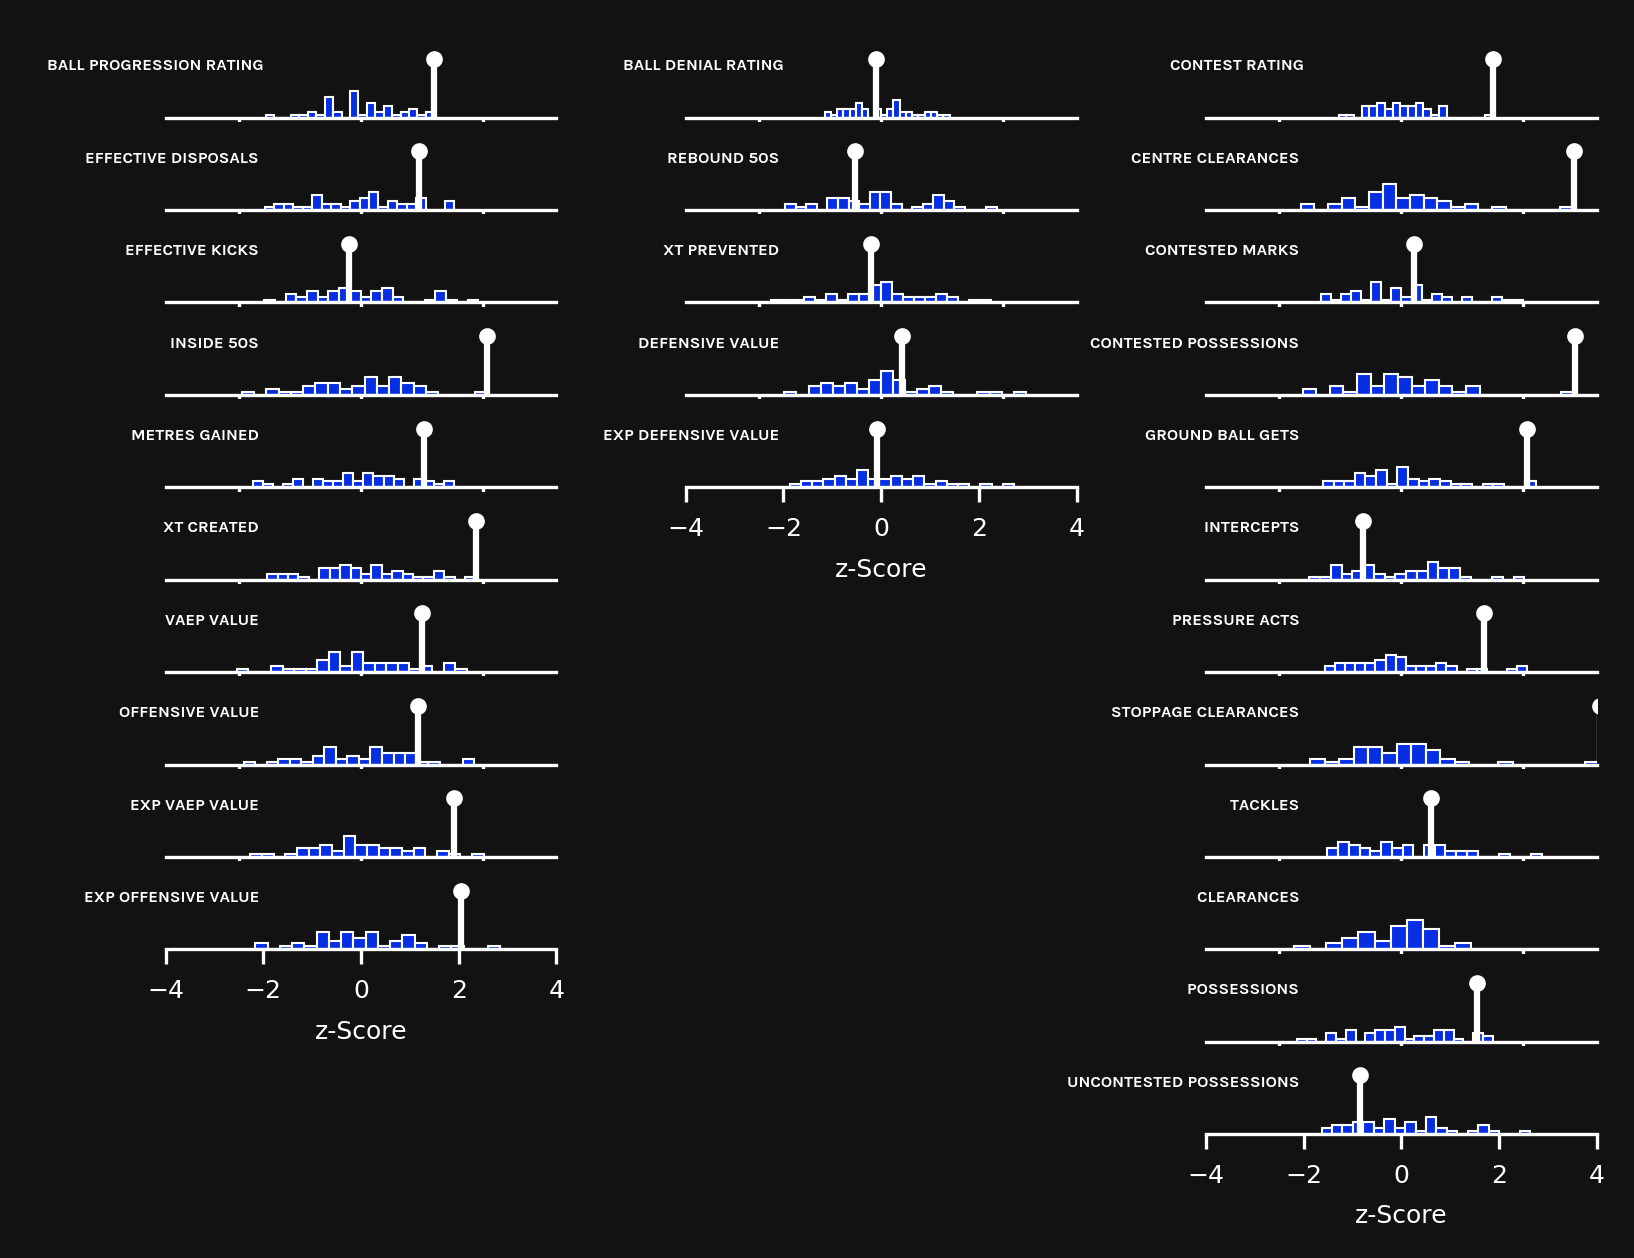

In [10]:
player = "Nic Naitanui"
team = "West Coast"
season = 2021

fig, axs = plot_multiple_role_histograms(position_summary, stats_list, player, team, season, xlim=4, ylim = 30)

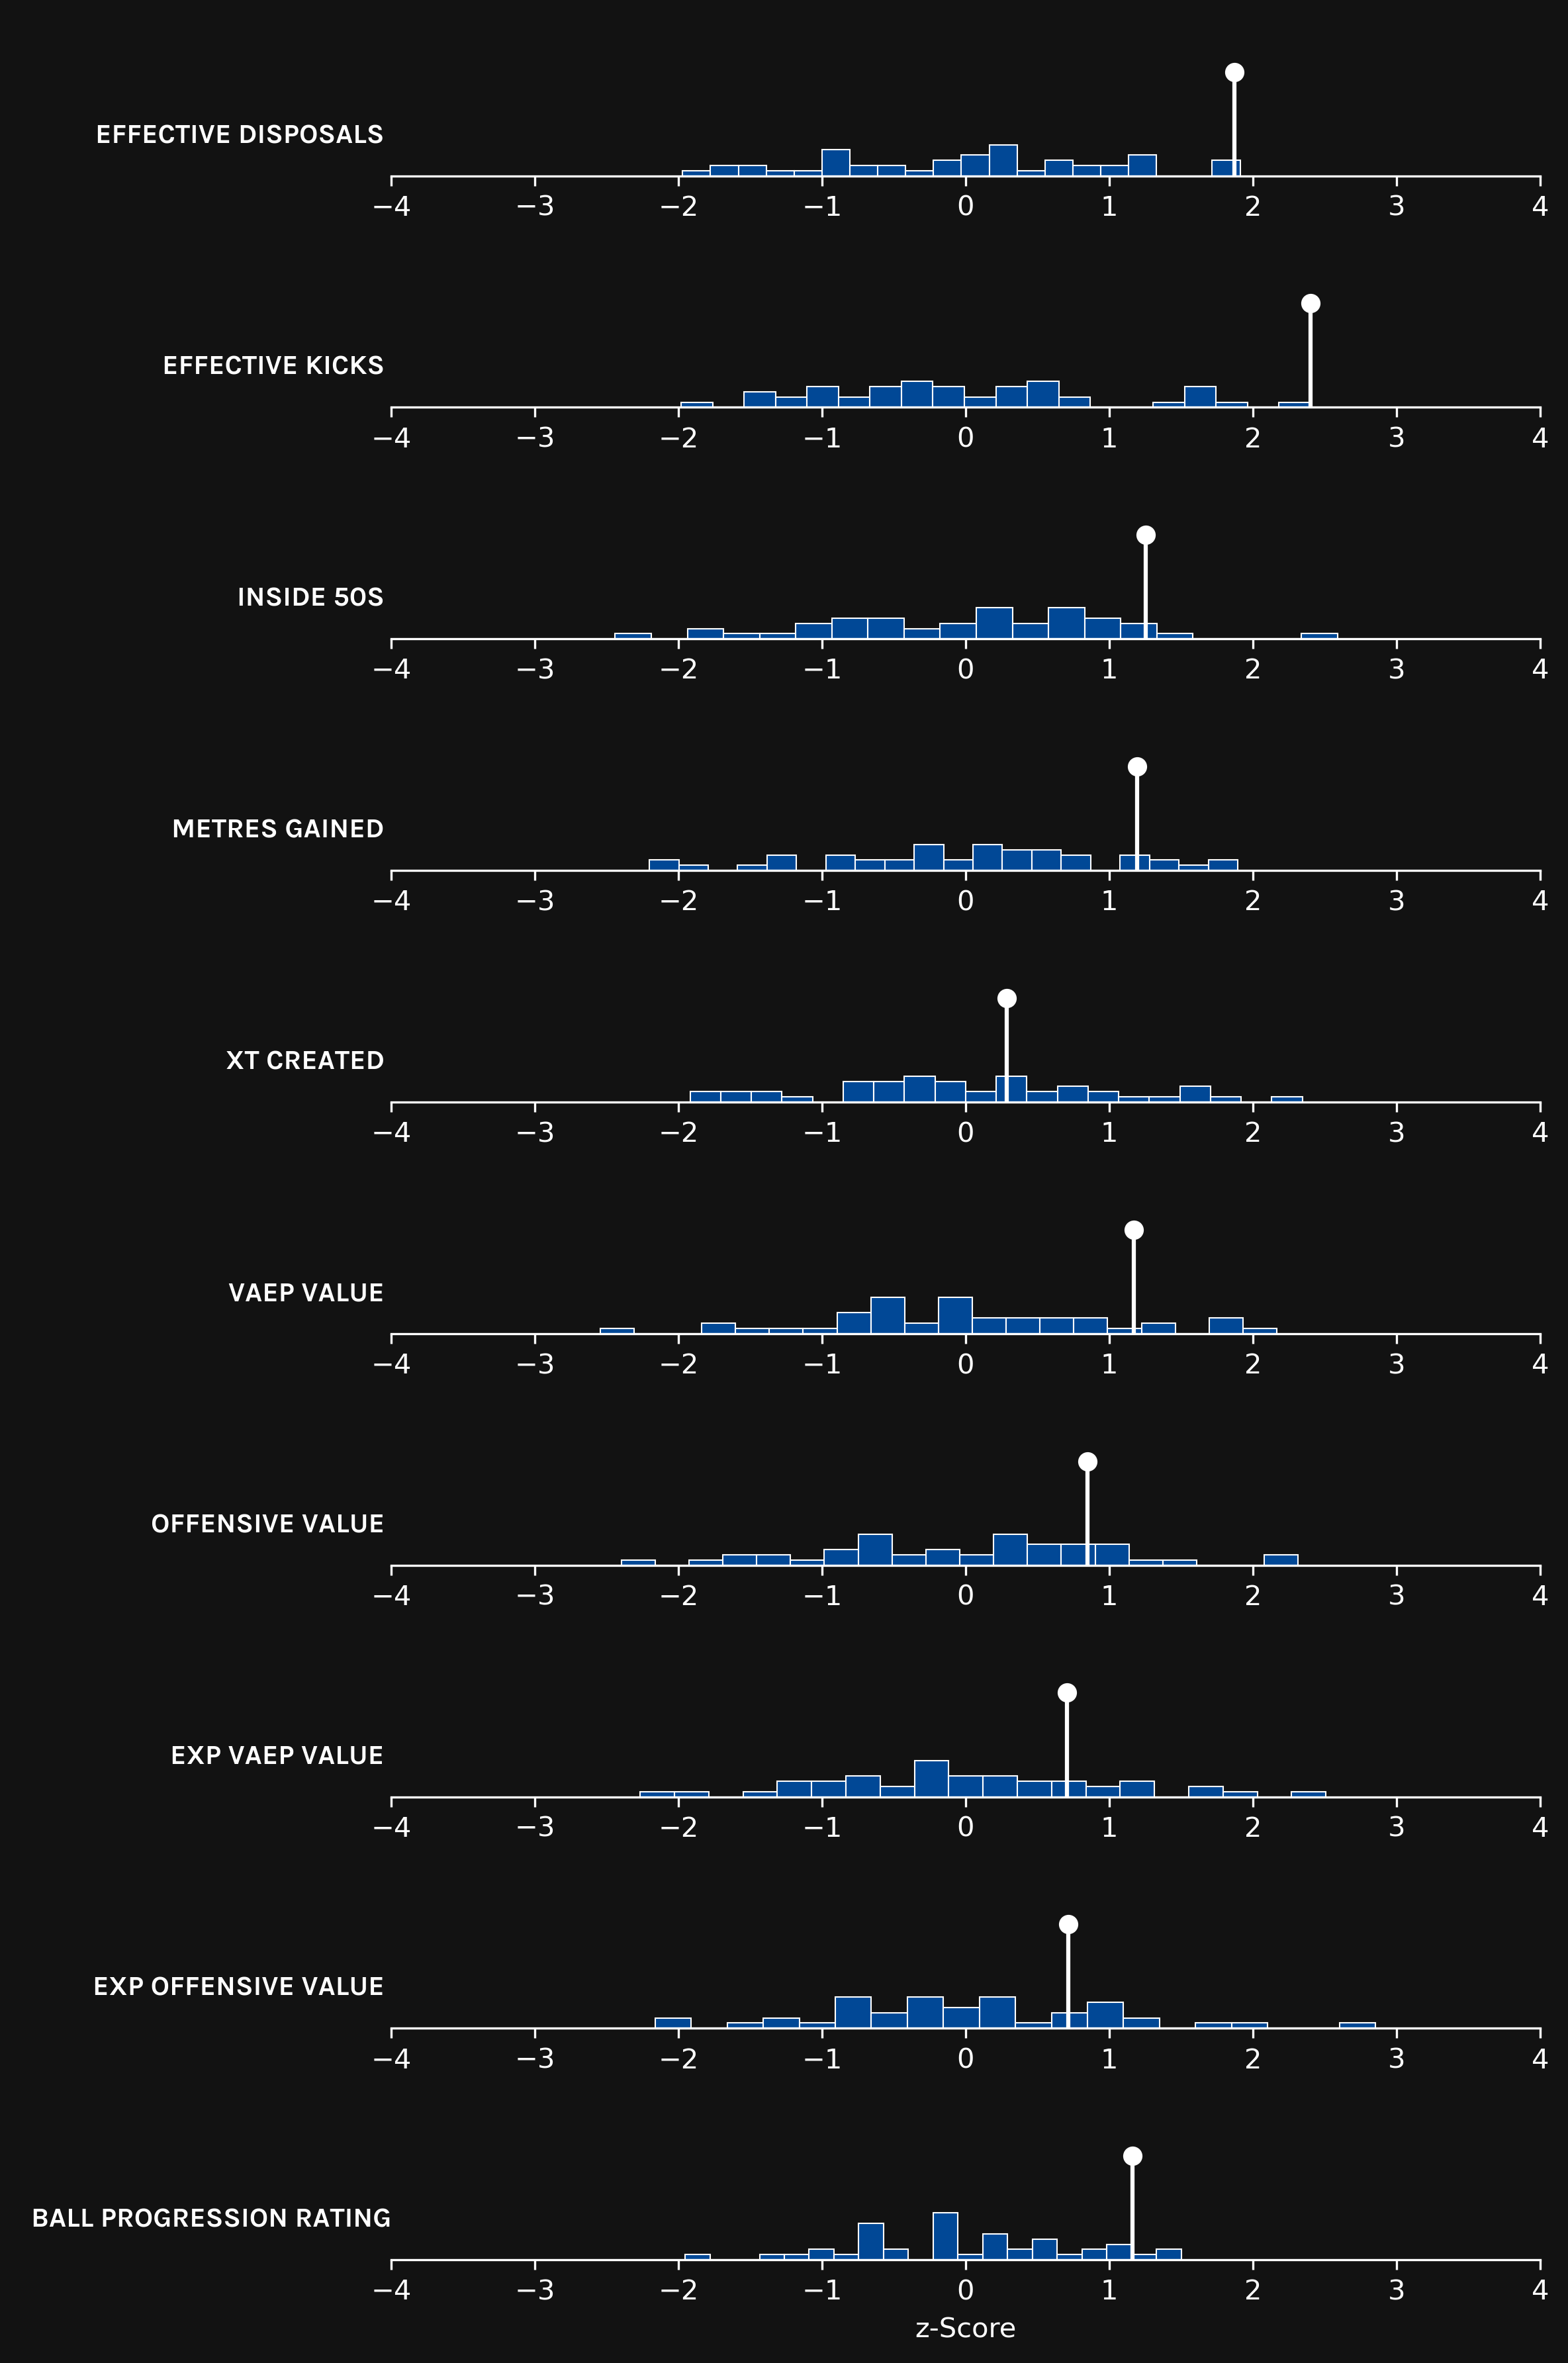

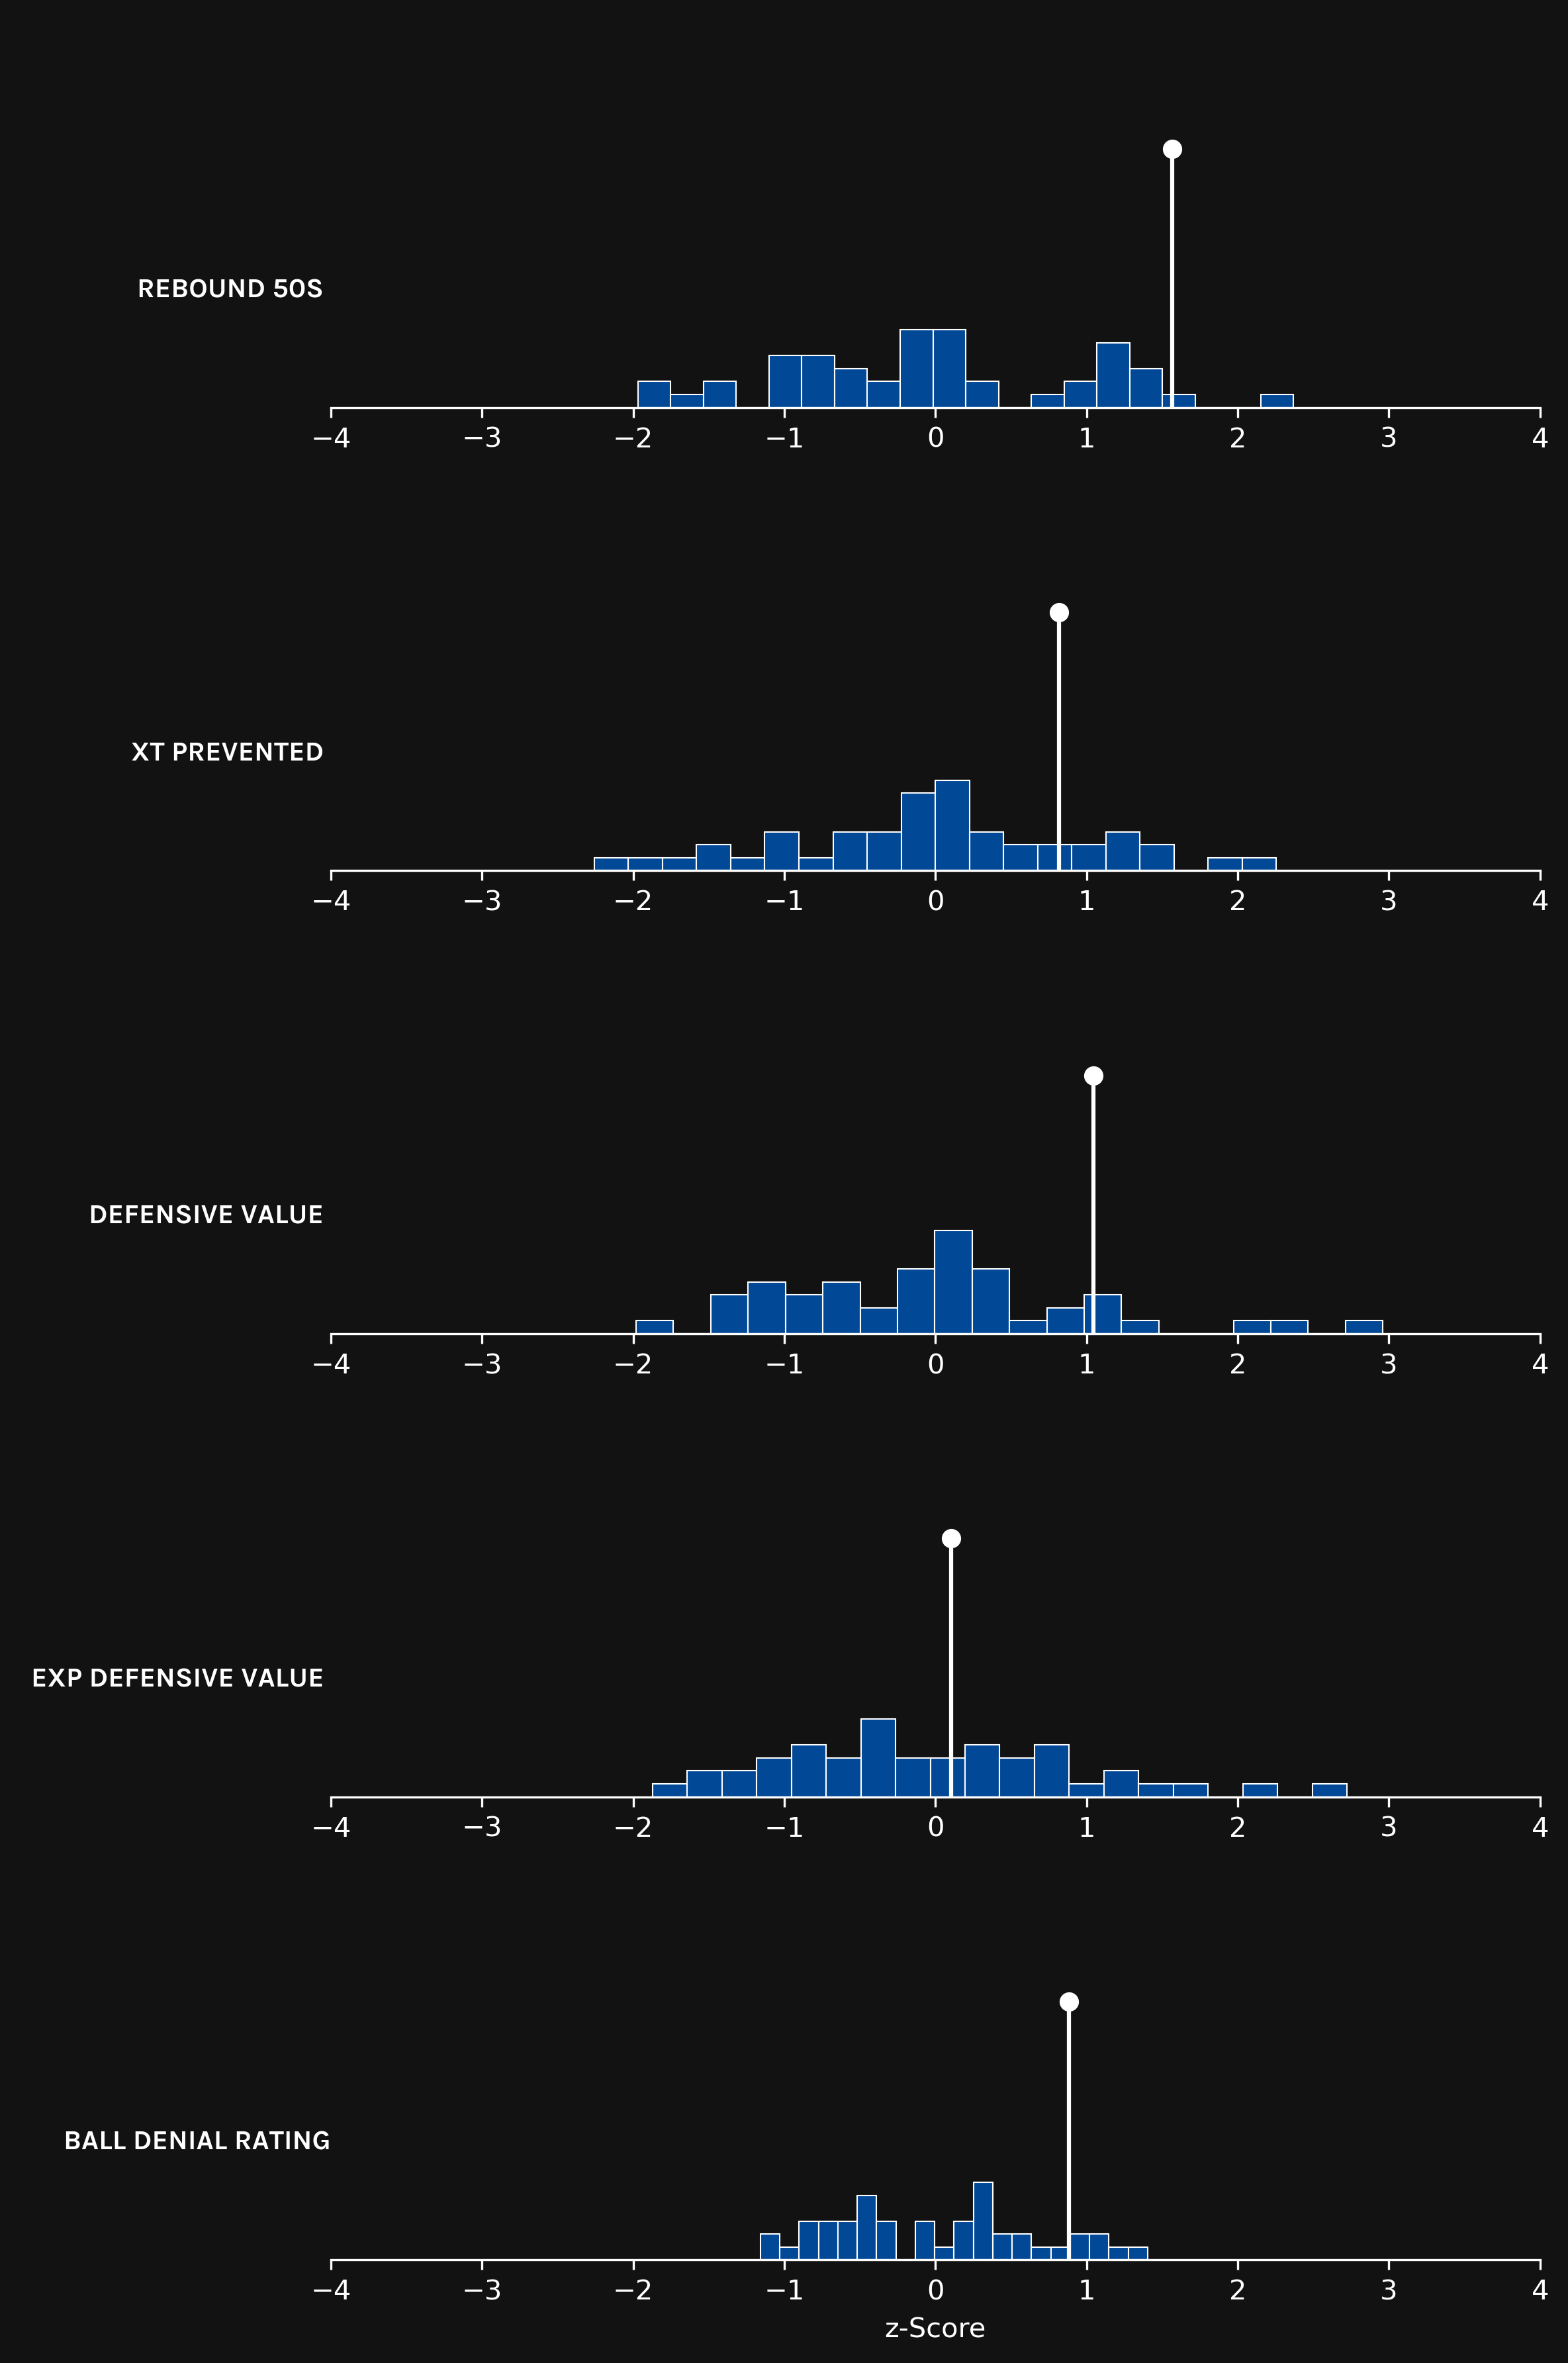

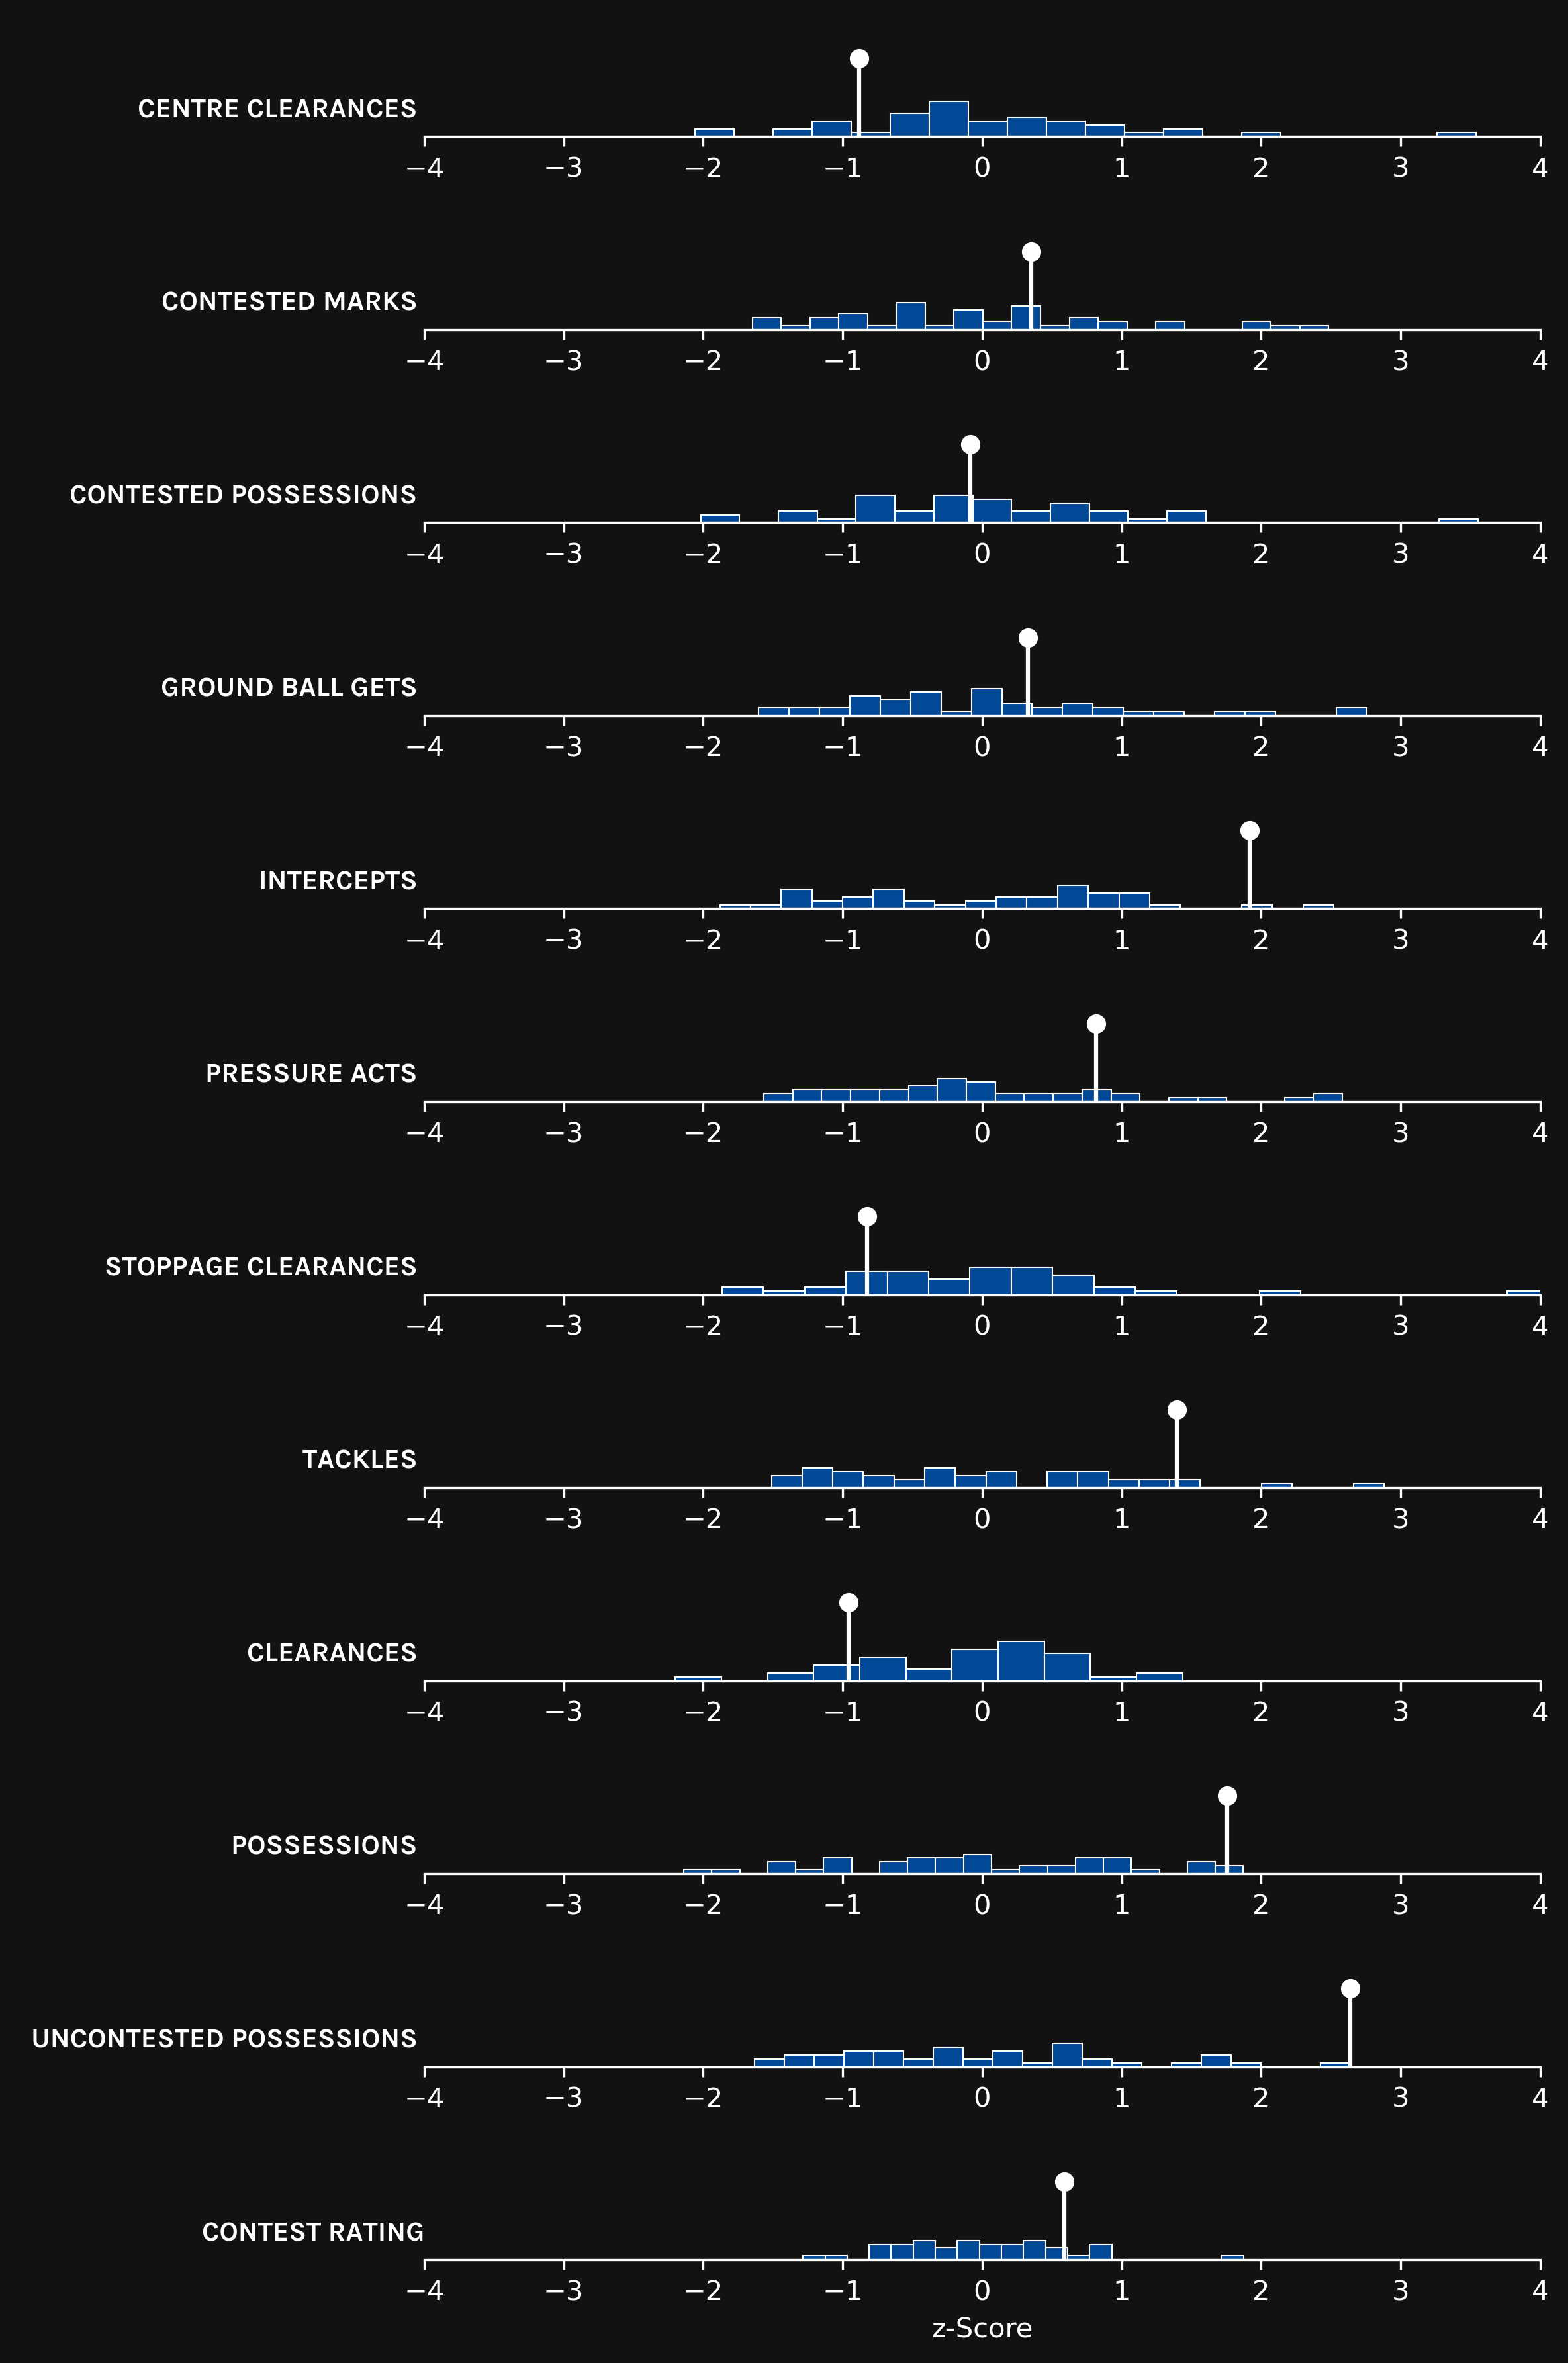

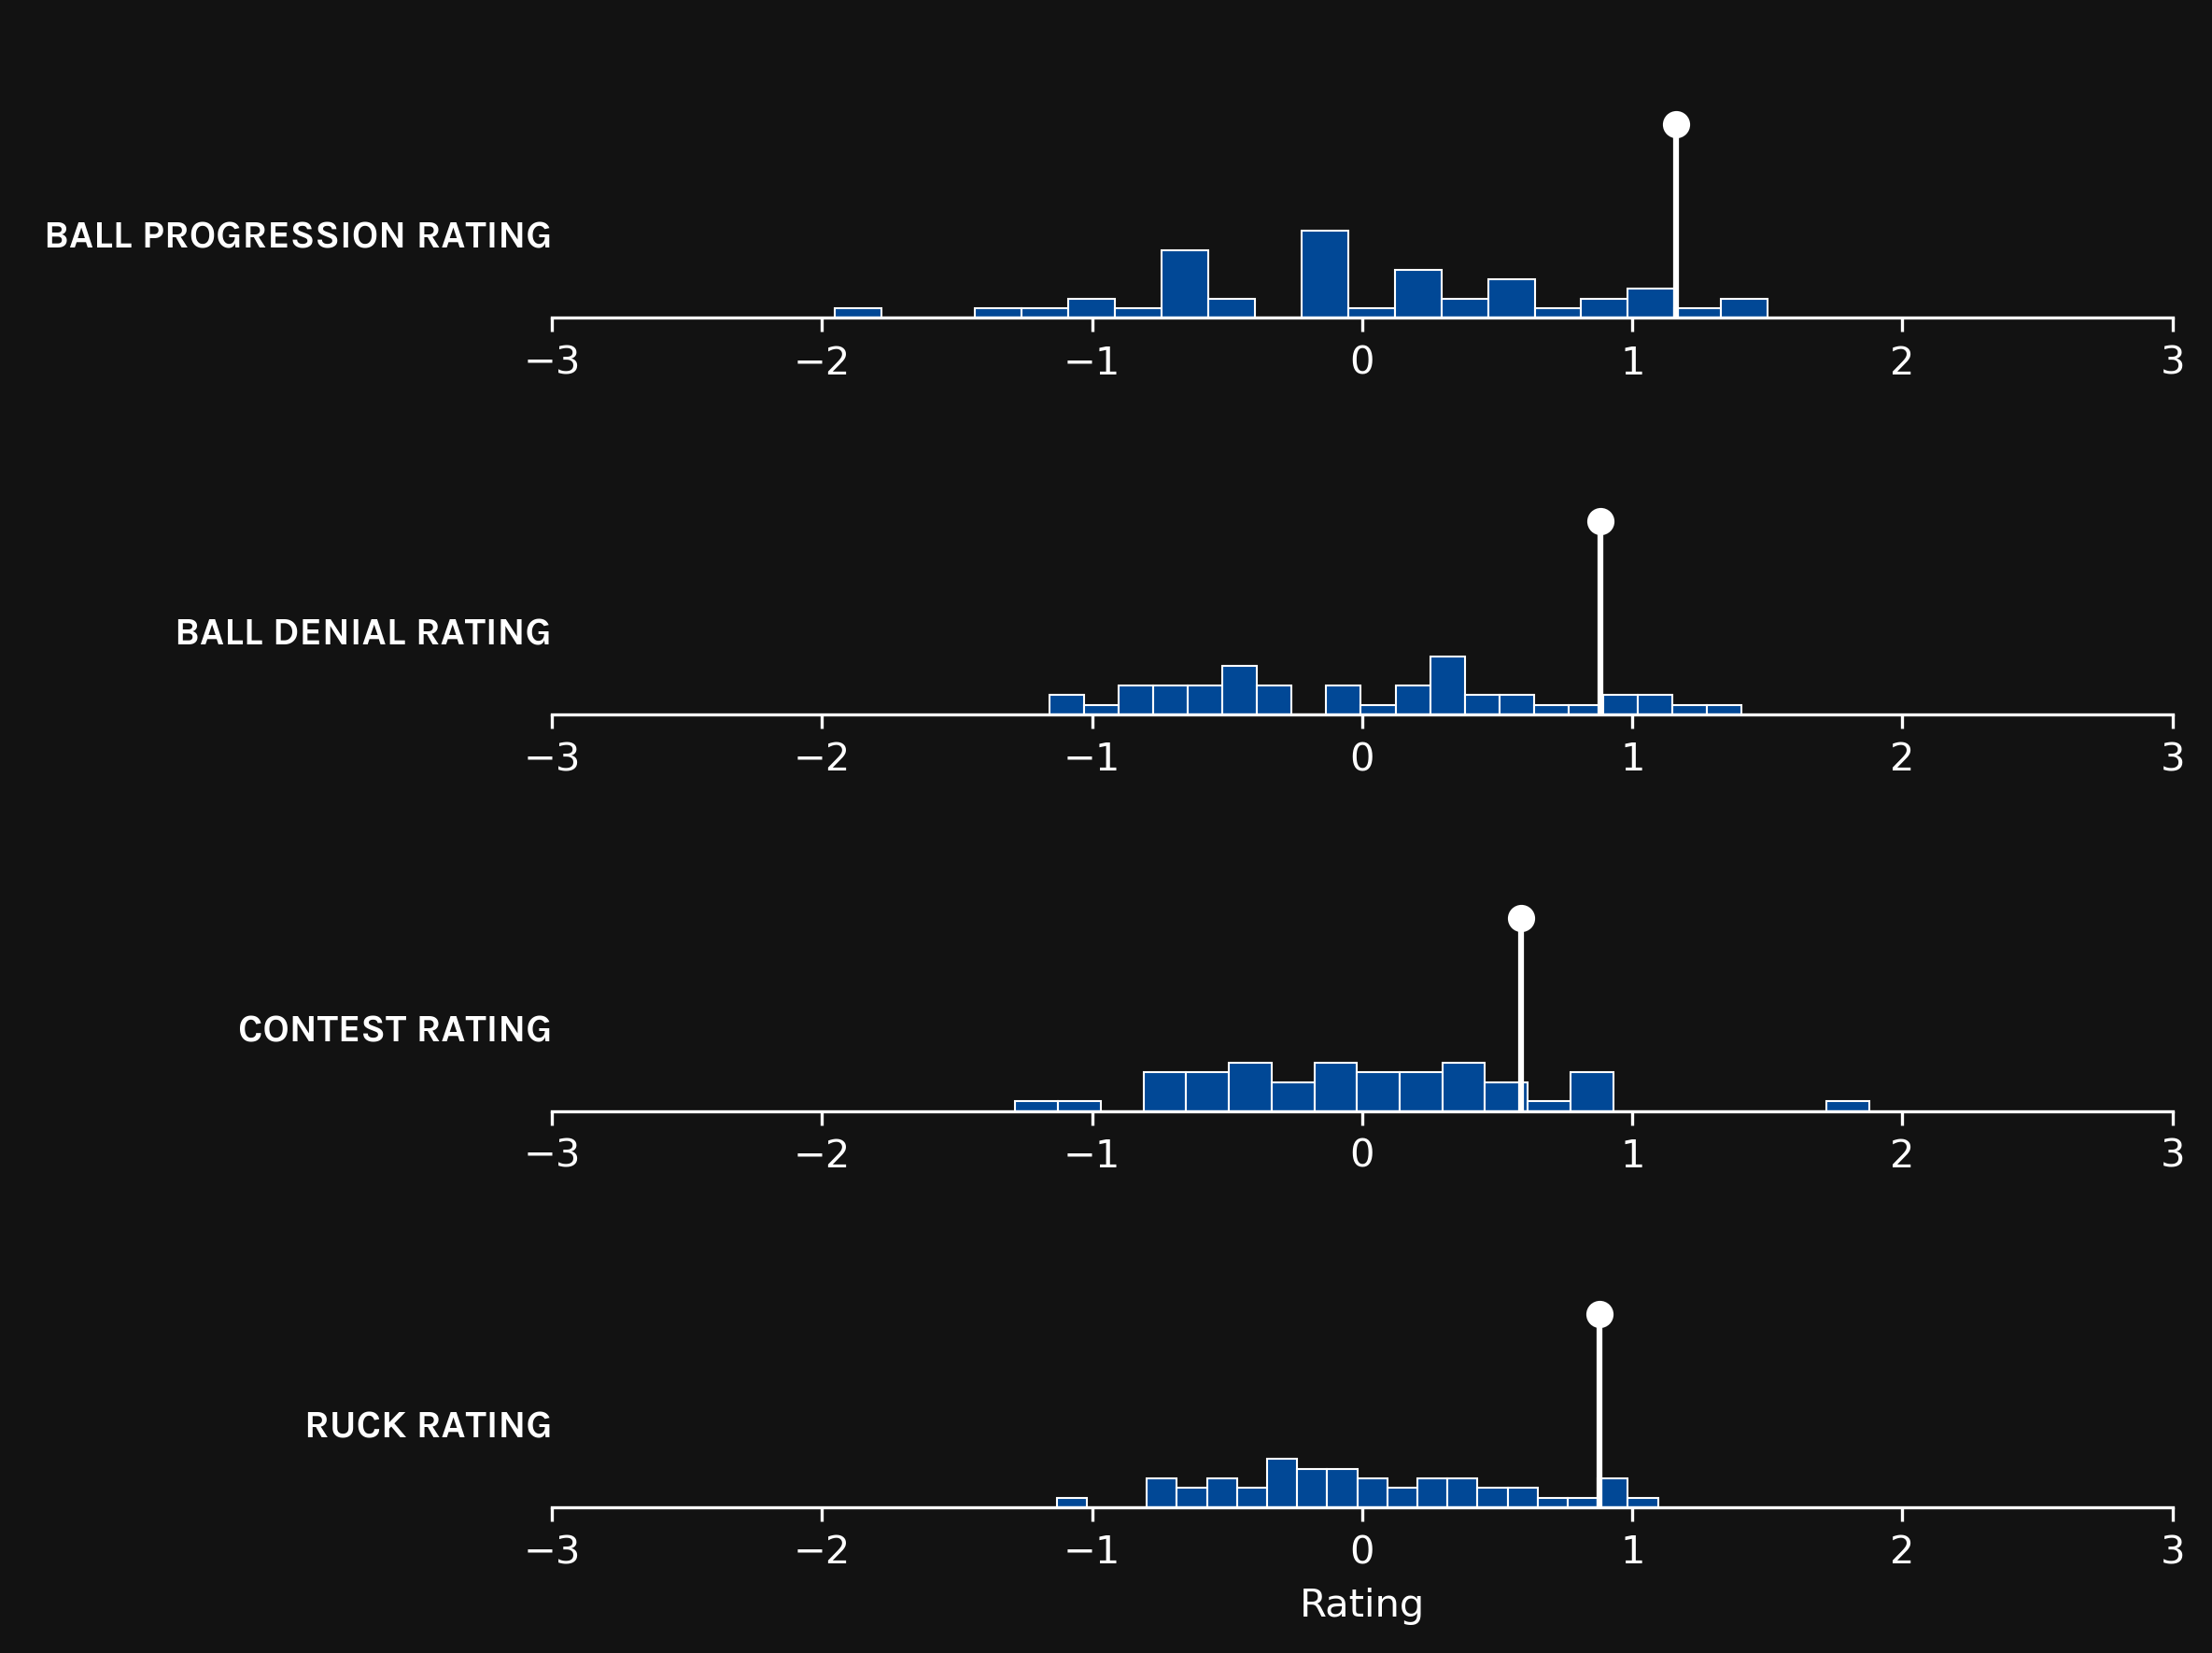

In [12]:
player = "Tim English"
team = "Western Bulldogs"
season = 2023

for role in position_role_stats_zscaled.keys():
    stats = position_role_stats_zscaled[role] + [role+'_rating']
    fig, ax = player_stats_histograms(position_summary, player, team, season, stats)
    
stats = [x+"_rating" for x in list(position_role_stats_zscaled.keys())] + [selected_position_rating]
fig, ax = player_stats_histograms(position_summary, player, team, season, stats, figsize=(8, 6), xlim=3, xlabel = "Rating")
    